In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("spam text.csv")
data.sample(8)

,Category,Message
834,ham,Thank you so much. When we skyped wit kz and s...
348,ham,One small prestige problem now.
2157,ham,Hey cutie. How goes it? Here in WALES its kind...
996,ham,Change again... It's e one next to escalator...
406,ham,"Haha get used to driving to usf man, I know a ..."
199,ham,Hi its Kate how is your evening? I hope i can ...
4036,spam,YOU ARE CHOSEN TO RECEIVE A £350 AWARD! Pls ca...
5523,ham,Going to join tomorrow.


In [3]:
data.info()
#tidak ada data yang missing, dan jumlah data ada 5572

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
data.groupby('Category').describe().T

Category                           ham                                               spam
Message count                     4825                                                747
        unique                    4516                                                641
        top     Sorry, I'll call later  Please call our customer service representativ...
        freq                        30                                                  4

data imbalance antara spam dengan ham(non spam)
dengan ketentuan : data spam terbanyak dengan kuantitas 4 yaitu text : Please call our customer service representativ...
sedangkan data ham(non spam) dengan kuantitas 30 yaitu text : Sorry, I'll call later

---



Text(0.5, 1.0, 'PROPORSI CATEGORY(%)')

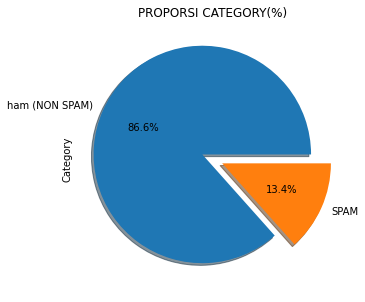

In [5]:
#EDA VISUALIZATION
labels = 'ham (NON SPAM)','SPAM'
data['Category'].value_counts().plot.pie(explode=[0.1,0.1],labels=labels, autopct='%1.1f%%',shadow=True,figsize=(5,5));
plt.title("PROPORSI CATEGORY(%)") #data imbalance perlu tindakan

In [6]:
def print_message(index):
    example = data[data.index == index][['Message', 'Category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Message:', example[1])
print_message(1002) #salah satu contoh isi dari message di index 1002 yang isinya spam

Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!
Message: spam


In [7]:
print_message(108)#salah satu contoh isi dari message di index 108 yang isinya ham

How would my ip address test that considering my computer isn't a minecraft server
Message: ham


In [8]:
data.drop_duplicates(inplace = True)#menghapus data duplicated

In [9]:
import re
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
data['Message'] = data['Message'].apply(cleanText)

In [10]:
data.shape

(5157, 2)

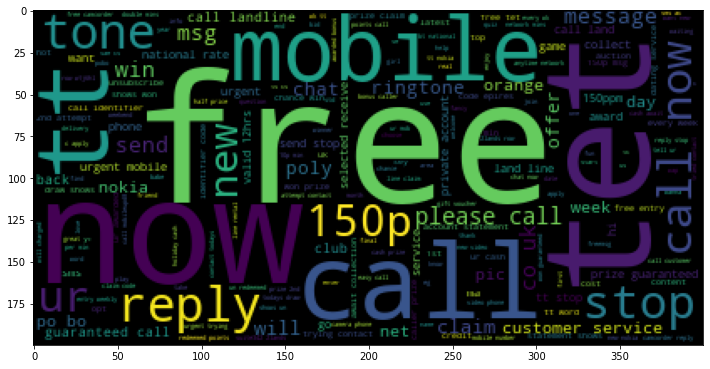

In [11]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

spam_list = data[data["Category"] == "spam"]["Message"].unique().tolist()
spam = " ".join(spam_list)
spam_wordcloud = WordCloud().generate(spam)
plt.figure(figsize=(12,8))
plt.imshow(spam_wordcloud)
plt.show()#kata kata mayoritas yang terdapat di category spam

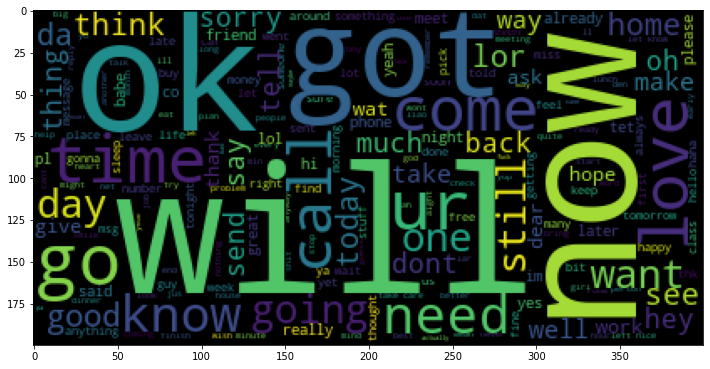

In [12]:
ham_list = data[data["Category"] == "ham"]["Message"].unique().tolist()
ham = " ".join(ham_list)
ham_wordcloud = WordCloud().generate(ham)
plt.figure(figsize=(12,8))
plt.imshow(ham_wordcloud)
plt.show()#kata kata mayoritas yang terdapat di category ham

In [13]:
encode = {"Category":{"ham": 0, "spam": 1}}
data = data.replace(encode)
data.tail()

,Category,Message
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ü b going to esplanade fr home?
5569,0,"pity, * was in mood for that. so...any other s..."
5570,0,the guy did some bitching but i acted like i'd...
5571,0,rofl. its true to its name


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = data['Message']
y = data['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


rf = RandomForestClassifier(random_state = 75)
rf.fit(X_train_tfidf, y_train)
print(classification_report(y_test, rf.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       908
           1       1.00      0.77      0.87       124

    accuracy                           0.97      1032
   macro avg       0.98      0.88      0.93      1032
weighted avg       0.97      0.97      0.97      1032



In [16]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

counter = Counter(y_train)
print('Before',counter)

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train_tfidf, y_train)
counter = Counter(y_ros)
print('After',counter)

Before Counter({0: 3608, 1: 517})
After Counter({0: 3608, 1: 3608})


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [17]:
rf1 = RandomForestClassifier()
rf1.fit(X_ros, y_ros)
print(classification_report(y_test, rf1.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       908
           1       1.00      0.82      0.90       124

    accuracy                           0.98      1032
   macro avg       0.99      0.91      0.95      1032
weighted avg       0.98      0.98      0.98      1032



In [18]:
from imblearn.under_sampling import RandomUnderSampler
counter = Counter(y_train)
print('Before',counter)
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train_tfidf, y_train)
counter = Counter(y_rus)
print('After',counter)

Before Counter({0: 3608, 1: 517})
After Counter({0: 517, 1: 517})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [19]:
rf2 = RandomForestClassifier()
rf2.fit(X_rus, y_rus)
print(classification_report(y_test, rf2.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       908
           1       0.95      0.85      0.90       124

    accuracy                           0.98      1032
   macro avg       0.96      0.92      0.94      1032
weighted avg       0.98      0.98      0.98      1032



In [20]:
rf3 = RandomForestClassifier(class_weight = 'balanced')
rf3.fit(X_train_tfidf, y_train)
print(classification_report(y_test, rf3.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       908
           1       1.00      0.74      0.85       124

    accuracy                           0.97      1032
   macro avg       0.98      0.87      0.92      1032
weighted avg       0.97      0.97      0.97      1032



In [21]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train_tfidf, y_train)
print(classification_report(y_test, NB.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       908
           1       1.00      0.59      0.74       124

    accuracy                           0.95      1032
   macro avg       0.97      0.79      0.86      1032
weighted avg       0.95      0.95      0.94      1032



In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=75)
lr.fit(X_train_tfidf, y_train)
print(classification_report(y_test, lr.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       908
           1       1.00      0.72      0.84       124

    accuracy                           0.97      1032
   macro avg       0.98      0.86      0.91      1032
weighted avg       0.97      0.97      0.96      1032



In [23]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train_tfidf, y_train)
print(classification_report(y_test, svc.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       908
           1       0.99      0.86      0.92       124

    accuracy                           0.98      1032
   macro avg       0.99      0.93      0.96      1032
weighted avg       0.98      0.98      0.98      1032



mencoba menerjemahkan Pesan Spam ke bahasa lain dan kemudian menerjemahkannya kembali ke bahasa Inggris. Idenya adalah kita akan menambahkan sedikit gangguan dengan melakukan terjemahan.

In [37]:
message = ['this is the 2nd time we have tried 2 contact']
seq = tfidf.transform(message)
pred = rf2.predict(seq)
labels = ['NON SPAM','SPAM']
print(pred, labels[np.argmax(pred)])

[0] NON SPAM


In [38]:
message1 = ['free for 1st week! no1 nokia tone 4 ur mobile phone and shut up']
seq1 = tfidf.transform(message1)
pred1 = rf2.predict(seq1)
labels1 = ['NON SPAM','SPAM']
print(pred1, labels1[np.argmax(pred1)])#MENUNJUKAN ANGKA 1 TETAPI NON SPAM HAL INI KARENA NILAI PROBABILITAS 

[1] NON SPAM
